# STAT 201 Group Project

 ### Group 14 - Asteria Xu, Charles Deng, Jessie Sheng, Yaroslav Yaldin

<!-- ## **Predictive Analysis of Academic Performance Utilizing Study Habits and Prior Achievement Metrics** -->
## **A Decade-by-Decade Comparison of Average Movie Ratings**

In [1]:
# libraries needed in this proposal

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

## **Introduction**

<!-- #### **Contextual Background and Relevance of the Topic** -->

For nearly a century, the cinema industry has been an important entertainment source. However, modern audiences are losing patience with films due to the abundance of short videos, finding monotonous plots tiresome. Writing a successful script is not solely about box office performance  but also about how the story is told (Jehoshua et al.). Producers should focus on creating compelling plots, as the plot structure and setting strongly influence the audience's viewing experience and movie rating (Xie, H et al.). 

<!-- #### **Primary Objectives and Research Questions of Our Project** -->
#### **Primary Objectives and Research Question**

People's tastes in films are constantly evolving, some claiming that current directors are incapable of producing quality films. In this case, our group aims to answer the following question: 

> **Is the average audience rating of movies from 2001-2010 significantly greater than the average audience rating of movies from 2011-2020?**


<!-- #### **Comprehensive Description and Justification of the Dataset Employed** -->
#### **Dataset Description**

We will examine the Kaggle “Movie Industry'' dataset, which consists of qualitative and quantitative variables such as movie name, genre, runtime, year, and IMDb rating from 1980 to 2020. We will focus on the scores of movies from 2001 to 2020 in our report.

#### **Response Variable**

The response variable is the difference in mean movie ratings between 2001-2010 and 2011-2020, with the standard deviation as the scale parameter. Both sample distributions are unimodal and close to a normal distribution, but slightly left-skewed. The large sample sizes (n = ~2000) allow us to apply the CLT.


## **Preliminary Results**

#### **Data Acquisition**

We commence our analysis fetching our study's CSV dataset from the project's remote repository. The ensuing code permits instantaneous import and examination of the data. A concise summary of the imported dataset is provided below:

In [2]:
# download data from our group's remote repository

url <- "https://raw.githubusercontent.com/yyaldin/stat201pr/main/movies.csv"

data <- read_csv(url)
cat("Table 1: Data summary")
data

Rows: 7668 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): name, rating, genre, released, director, writer, star, country, com...
dbl (6): year, score, votes, budget, gross, runtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Table 1: Data summary

name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.9e+07,46998772,Warner Bros.,146
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5e+06,58853106,Columbia Pictures,104
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.8e+07,538375067,Lucasfilm,124
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NA,Embi Productions,NA
It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",NA,NA,James Randall,James Randall,Christina Roz,United States,15000,NA,NA,120
Tee em el,NA,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NA,NA,PK 65 Films,102


#### **Initial Data Summary (Exploratory Data Analysis)**

We divide the data into two time-period subsets (2001-2010 and 2011-2020), cleanse missing 'score' values, and trim unrequired columns to retain only 'name', 'year', and 'score'.

In [3]:
# Subset the data for the two periods
data_2001_2010 <- filter(data, year >= 2001 & year <= 2010)%>%
    filter(!is.na(score))%>%
    select(name, year, score)
data_2011_2020 <- filter(data, year >= 2011 & year <= 2020)%>%
    filter(!is.na(score))%>%
    select(name, year, score)
tidy_combined_data <- data %>%
  filter(year >= 2001 & year <= 2020 & !is.na(score)) %>%
  mutate(decade = ifelse(year <= 2010, "2001-2010", "2011-2020")) %>%
  select(name, year, score, decade)
cat("Table 2: Tidy Data Summary (2001 - 2010 years)")
data_2001_2010
cat("Table 3: Tidy Data Summary (2011 - 2020 years)")
data_2011_2020
cat("Table 4: Tidy Data Summary Combined (2011 - 2020 & 2011 - 2020 years)")
tidy_combined_data

Table 2: Tidy Data Summary (2001 - 2010 years)

name,year,score
<chr>,<dbl>,<dbl>
Harry Potter and the Sorcerer's Stone,2001,7.6
The Fast and the Furious,2001,6.8
The Lord of the Rings: The Fellowship of the Ring,2001,8.8
⋮,⋮,⋮
Passion Play,2010,4.6
Kaboom,2010,5.7
Everything Must Go,2010,6.4


Table 3: Tidy Data Summary (2011 - 2020 years)

name,year,score
<chr>,<dbl>,<dbl>
Captain America: the First Avenger,2011,6.9
Thor,2011,7.0
Harry Potter and the Deathly Hallows: Part 2,2011,8.1
⋮,⋮,⋮
Dream Round,2020,4.7
Saving Mbango,2020,5.7
Tee em el,2020,5.7


Table 4: Tidy Data Summary Combined (2011 - 2020 & 2011 - 2020 years)

name,year,score,decade
<chr>,<dbl>,<dbl>,<chr>
Harry Potter and the Sorcerer's Stone,2001,7.6,2001-2010
The Fast and the Furious,2001,6.8,2001-2010
The Lord of the Rings: The Fellowship of the Ring,2001,8.8,2001-2010
⋮,⋮,⋮,⋮
Dream Round,2020,4.7,2011-2020
Saving Mbango,2020,5.7,2011-2020
Tee em el,2020,5.7,2011-2020


From the cleaned data subsets, we calculate mean, median, standard deviation, variance, and 'score' counts. The results are stored in respective 'summary_2001_2010' and 'summary_2011_2020' data frames.

In [4]:
# Compute parameters
summary_2001_2010 <- data_2001_2010 %>%
  summarise(sample_mean = mean(score, na.rm = TRUE),
            sample_median = median(score, na.rm = TRUE),
            sample_sd = sd(score, na.rm = TRUE),
            sample_var = var(score, na.rm = TRUE),
            n = n())

summary_2011_2020 <- data_2011_2020 %>%
  summarise(sample_mean = mean(score, na.rm = TRUE),
            sample_median = median(score, na.rm = TRUE),
            sample_sd = sd(score, na.rm = TRUE),
            sample_var = var(score, na.rm = TRUE),
            n = n())

# Combine both summaries into one data frame
# Reference: https://www.digitalocean.com/community/tutorials/rbind-function-r
parameters <- rbind(cbind(Period = "2001-2010", summary_2001_2010), 
                    cbind(Period = "2011-2020", summary_2011_2020))

cat("Table 5: Descriptive Statistics")
parameters

Table 4: Descriptive Statistics

Period,sample_mean,sample_median,sample_sd,sample_var,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2001-2010,6.425050,6.5,1.0069680,1.0139845,2000
2011-2020,6.517179,6.6,0.8853659,0.7838728,1822


Table 4 shows movie rating statistics for 2001-2010 and 2011-2020. The average scores increased slightly from 6.43 to 6.52, and the standard deviation decreased from 1.01 to 0.89, indicating a minor overall improvement and less score variability over time.

In [5]:
# Compute difference of means
diff_mean <- summary_2001_2010$sample_mean - summary_2011_2020$sample_mean 
# Compute standard error for the difference of means
SE_diff <- sqrt((summary_2001_2010$sample_sd^2 / summary_2001_2010$n) +
                (summary_2011_2020$sample_sd^2 / summary_2011_2020$n))
# Compute degrees of freedom
df <- summary_2001_2010$n + summary_2011_2020$n - 2
# Compute the degrees of freedom using the Welch-Satterthwaite equation
df_welch <- (
    (summary_2001_2010$sample_sd^2 / summary_2001_2010$n + summary_2011_2020$sample_sd^2 / summary_2011_2020$n)^2
) / (
    (summary_2001_2010$sample_sd^4 / (summary_2001_2010$n^2 * (summary_2001_2010$n - 1))) +
    (summary_2011_2020$sample_sd^4 / (summary_2011_2020$n^2 * (summary_2011_2020$n - 1)))
)
# Storing computation in the tibble
summary_stats <- tibble(
  n_sample_01_10 = summary_2001_2010$n,
  mean_sample_01_10 = summary_2001_2010$sample_mean,
  n_sample_11_20 = summary_2011_2020$n,
  mean_sample_11_20 = summary_2011_2020$sample_mean,
  diff_in_means = diff_mean,
  std_error = SE_diff,
  df = df,
  df_welch = df_welch
)
cat("Table 6: Descriptive Statistics for Differences in Mean Movie Scores between 2001-2010 and 2011-2020\n")
summary_stats

n_sample_01_10,mean_sample_01_10,n_sample_11_20,mean_sample_11_20,diff_in_means,std_error,df,df_welch
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,6.42505,1822,6.517179,-0.09212892,0.03061403,3820,3815.233


The calculated statistics reveal a slight increase in movie ratings from 2001-2010 (mean: 6.43, n: 2000) to 2011-2020 (mean: 6.52, n: 1822), with a mean difference of 0.09 and a standard error of 0.03. Degrees of freedom were approximated to around 3820.

#### **Data Visualization**

These visuals examine movie ratings for 2001-2010 and 2011-2020 using histograms, a box plot, and density plots. They highlight distribution patterns and central tendencies across periods, enabling a detailed comparative analysis of statistical attributes.

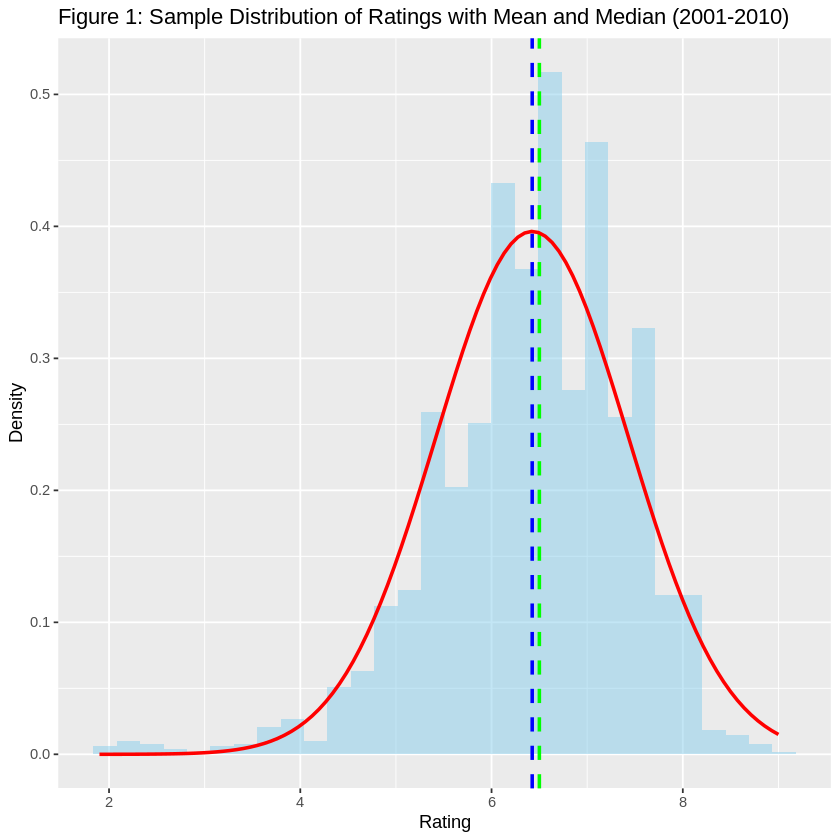

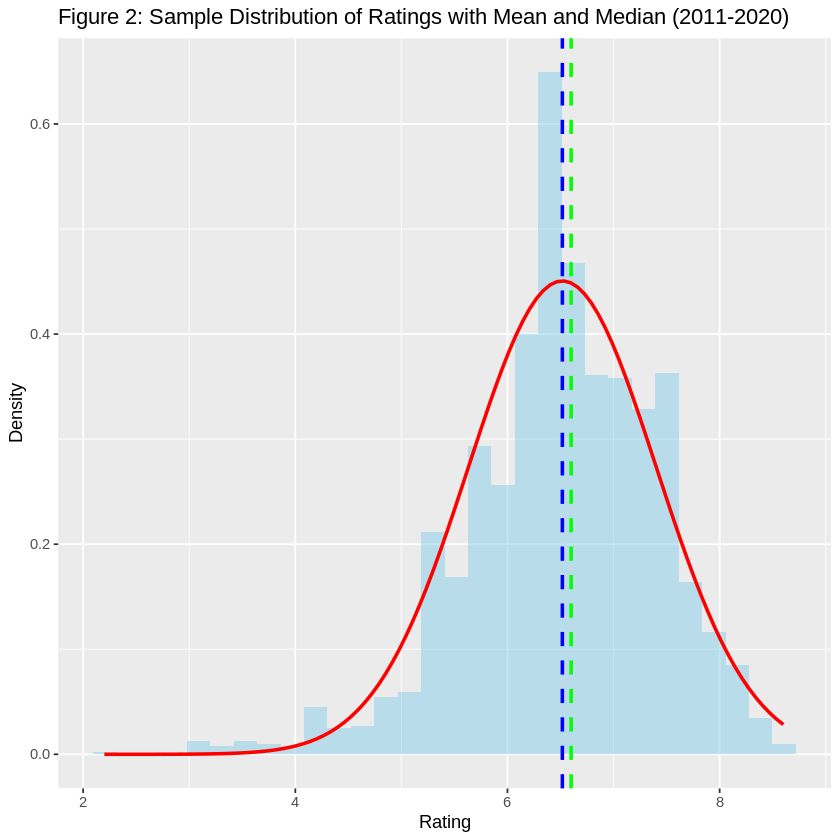

In [6]:
# Calculate x and y coordinates for the normal curve
x <- seq(min(data_2001_2010$score, na.rm = TRUE), max(data_2001_2010$score, na.rm = TRUE), length.out = 100)
y <- dnorm(x, mean = mean(data_2001_2010$score, na.rm = TRUE), sd = sd(data_2001_2010$score, na.rm = TRUE))
df_norm_2001_2010 <- data.frame(x = x, y = y)

x <- seq(min(data_2011_2020$score, na.rm = TRUE), max(data_2011_2020$score, na.rm = TRUE), length.out = 100)
y <- dnorm(x, mean = mean(data_2011_2020$score, na.rm = TRUE), sd = sd(data_2011_2020$score, na.rm = TRUE))
df_norm_2011_2020 <- data.frame(x = x, y = y)
# For 2001-2010 data:

# Compute median
median_2001_2010 <- median(data_2001_2010$score, na.rm = TRUE)

# Plot histogram with normal distribution curve and median
ggplot(data_2001_2010, aes(x = score)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(score, na.rm = TRUE)), color = "blue", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median_2001_2010), color = "green", linetype = "dashed", size = 1) + # Median line
  geom_line(data = df_norm_2001_2010, aes(x = x, y = y), colour = "red", size = 1) +
  ggtitle("Figure 1: Sample Distribution of Ratings with Mean and Median (2001-2010)") +
  xlab("Rating") +
  ylab("Density")

# For 2011-2020 data:

# Compute median
median_2011_2020 <- median(data_2011_2020$score, na.rm = TRUE)

# Plot histogram with normal distribution curve and median
ggplot(data_2011_2020, aes(x = score)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(score, na.rm = TRUE)), color = "blue", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median_2011_2020), color = "green", linetype = "dashed", size = 1) + # Median line
  geom_line(data = df_norm_2011_2020, aes(x = x, y = y), colour = "red", size = 1) +
  ggtitle("Figure 2: Sample Distribution of Ratings with Mean and Median (2011-2020)") +
  xlab("Rating") +
  ylab("Density")

Figures 1 and 2 display normally-distributed, slightly left-skewed histograms of movie ratings for 2001-2010 and 2011-2020. The mean is represented by the blue line, while the red curve indicates ideal normality, validating the use of inferential statistics. The large sample size (~2000) supports the Central Limit Theorem (CLT) application and minimizes skewness concerns.

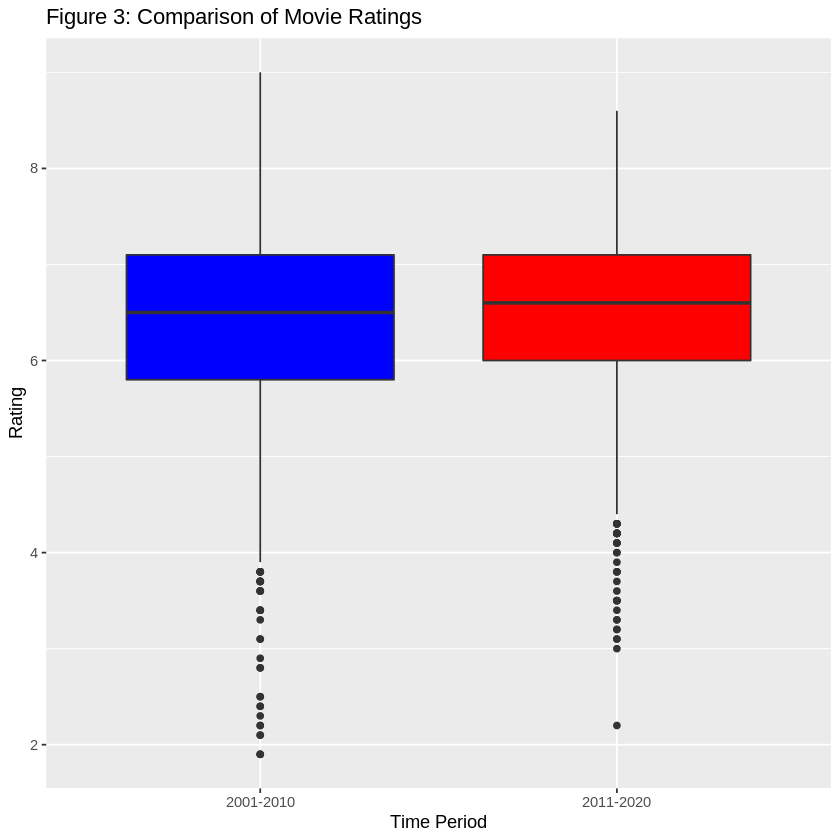

In [7]:
ggplot() +
  geom_boxplot(data = data_2001_2010, aes(x = "2001-2010", y = score), fill = "blue") +
  geom_boxplot(data = data_2011_2020, aes(x = "2011-2020", y = score), fill = "red") +
  xlab("Time Period") +
  ylab("Rating") +
  ggtitle("Figure 3: Comparison of Movie Ratings")


Figure 3's box plots compare movie ratings from 2001-2010 and 2011-2020, showing similar IQR and median values, implying minor shifts in central tendency and dispersion. Lower-rating outliers exist in both periods.

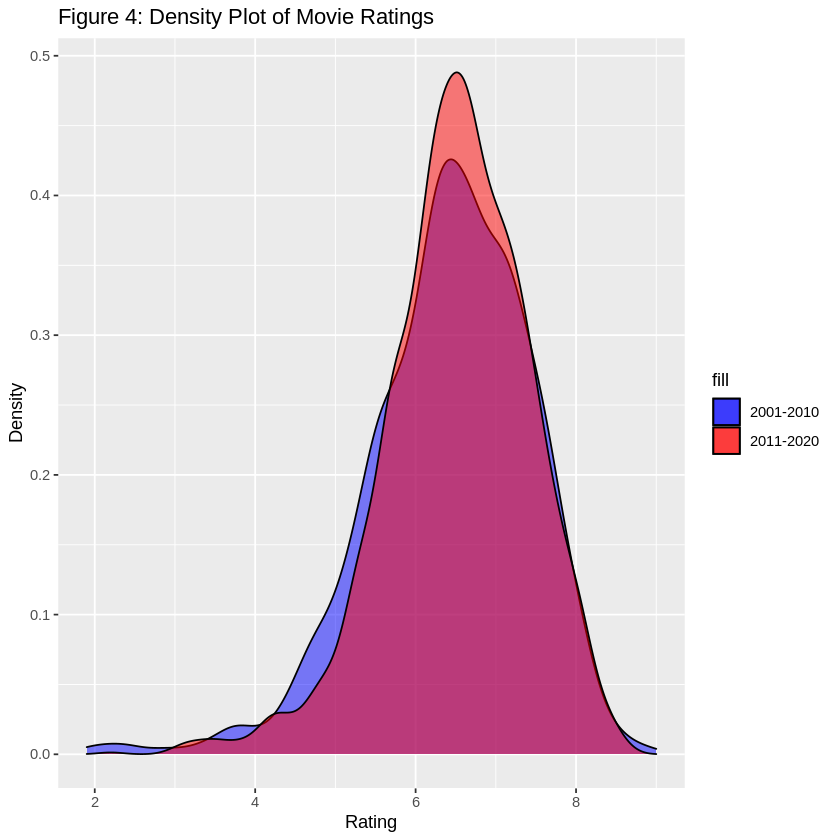

In [8]:
ggplot() +
  geom_density(data = data_2001_2010, aes(x = score, fill = "2001-2010"), alpha = 0.5) +
  geom_density(data = data_2011_2020, aes(x = score, fill = "2011-2020"), alpha = 0.5) +
  xlab("Rating") +
  ylab("Density") +
  ggtitle("Figure 4: Density Plot of Movie Ratings") +
  scale_fill_manual(values = c("blue", "red"))

Figure 4's overlaid density plots compare movie ratings from 2001-2010 to 2011-2020. While there's a significant overlap, the earlier decade shows broader distribution, suggesting varied ratings, and the latter has a pronounced peak, indicating ratings centered around the mean. This highlights subtle changes in rating distributions over time.

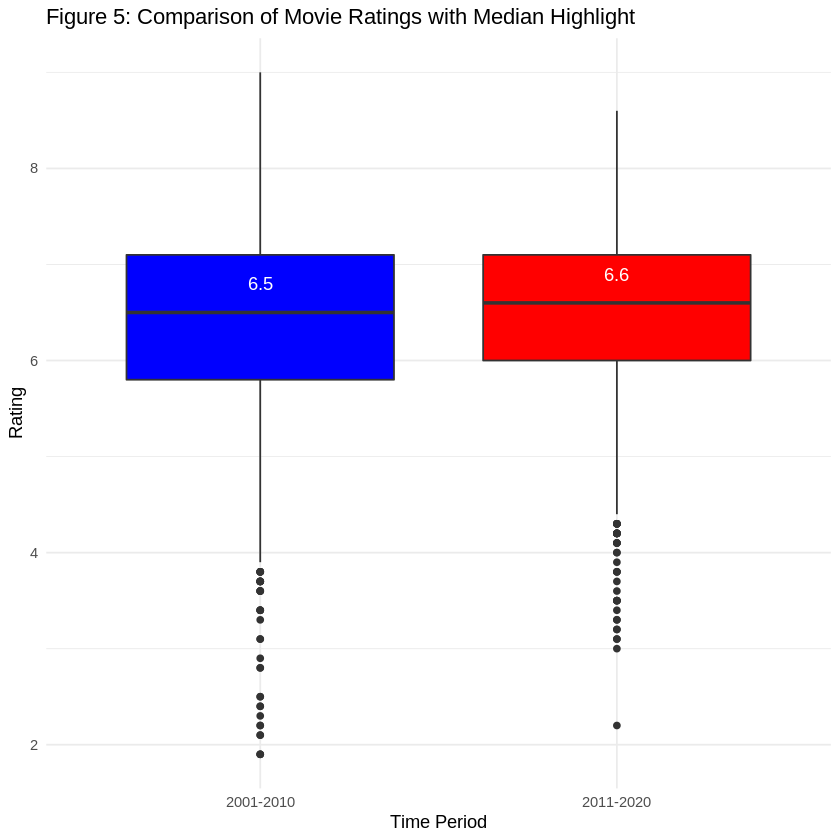

In [9]:
median_2001_2010 <- median(data_2001_2010$score)
median_2011_2020 <- median(data_2011_2020$score)

ggplot() +
  geom_boxplot(data = data_2001_2010, aes(x = "2001-2010", y = score), fill = "blue") +
  geom_boxplot(data = data_2011_2020, aes(x = "2011-2020", y = score), fill = "red") +
  geom_text(aes(x = "2001-2010", y = median_2001_2010 + 0.3, label = round(median_2001_2010, 2)), color = "white") +
  geom_text(aes(x = "2011-2020", y = median_2011_2020 + 0.3, label = round(median_2011_2020, 2)), color = "white") +
  xlab("Time Period") +
  ylab("Rating") +
  ggtitle("Figure 5: Comparison of Movie Ratings with Median Highlight") +
  theme_minimal()

## **Methods: Plan**

<!-- #### **Data Analysis Plan and Chosen Variables** -->

We are using IMDb's movie ratings dataset from Kaggle, which offers consistent, unbiased ratings and up-to-date data, providing a reliable indicator of the general public’s opinion. Its large sample size also ensures reliability and generalizability. 

While preliminary analysis and plots provide distribution and point estimates for the parameter of interest, they are insufficient for decision-making. We need hypothesis testing and confidence intervals for further statistical evidence to provide stakeholders.

#### **Hypothesis Testing**

We will conduct hypothesis tests in R using the p-value approach with a 5% significance level, analyze the confidence interval of the difference at a 95% confidence level, and utilize the `t.test` function to validate our calculations. We will perform a two-sample t-test with the following hypotheses:

Let $\mu_1$ be the average IMDb rating for movies between 2001 and 2010.

Let $\mu_2$ be the average IMDb rating for movies between 2011 and 2020.

$H_0: \mu_1- \mu_2 = 0$ 

$H_1: \mu_1- \mu_2 > 0$ 

We will compare means of two independent populations using the t-distribution since we only have access to sample data.

Hence we have,

Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

Null model: $t$-distribution with approximately $\nu$ degrees of freedom, where 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

<!-- 
#### **Visualization of Results** -->



In [16]:
# 1. Compute the t-statistic
t_statistic <- diff_mean / SE_diff

# 2. Get the p-value for the t-statistic
# We're using a one-tailed test
p_value <- 1 - pt(t_statistic, df_welch)

# 3. Compute the 95% confidence interval
alpha <- 0.05
t_critical <- qt(1 - alpha, df_welch)
margin_of_error <- t_critical * SE_diff
conf_interval <- c(diff_mean - margin_of_error, diff_mean + margin_of_error)
# 4. Using t.test() to verify calculations with unequal variances
test_result <- tidy(
    t.test(data_2001_2010$score, 
                      data_2011_2020$score,
                      alternative = "greater",
                      mu = 0,
                      var.equal = FALSE)) # Assuming unequal variance
# Print results
cat("T-statistic:", t_statistic, "\n")
cat("P-value:", p_value, "\n")
cat("95% Confidence Interval for Difference of Means:", conf_interval, "\n\n")
cat("Table 7: Results of Welch's Two-Sample t-test Comparing Mean Movie Scores from 2001-2010 to 2011-2020\n")
print(test_result)

T-statistic: -3.009369 
P-value: 0.9986825 
95% Confidence Interval for Difference of Means: -0.1424968 -0.0417611 

Table 7: Results of Welch's Two-Sample t-test Comparing Mean Movie Scores from 2001-2010 to 2011-2020
# A tibble: 1 × 10
  estim…¹ estim…² estim…³ stati…⁴ p.value param…⁵ conf.…⁶ conf.…⁷ method alter…⁸
    <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl> <chr>  <chr>  
1 -0.0921    6.43    6.52   -3.01   0.999   3815.  -0.142     Inf Welch… greater
# … with abbreviated variable names ¹​estimate, ²​estimate1, ³​estimate2,
#   ⁴​statistic, ⁵​parameter, ⁶​conf.low, ⁷​conf.high, ⁸​alternative


In [11]:
d_median_hat <- median(data_2011_2020$score) - median(data_2001_2010$score)
d_median_hat

[1] 0.1

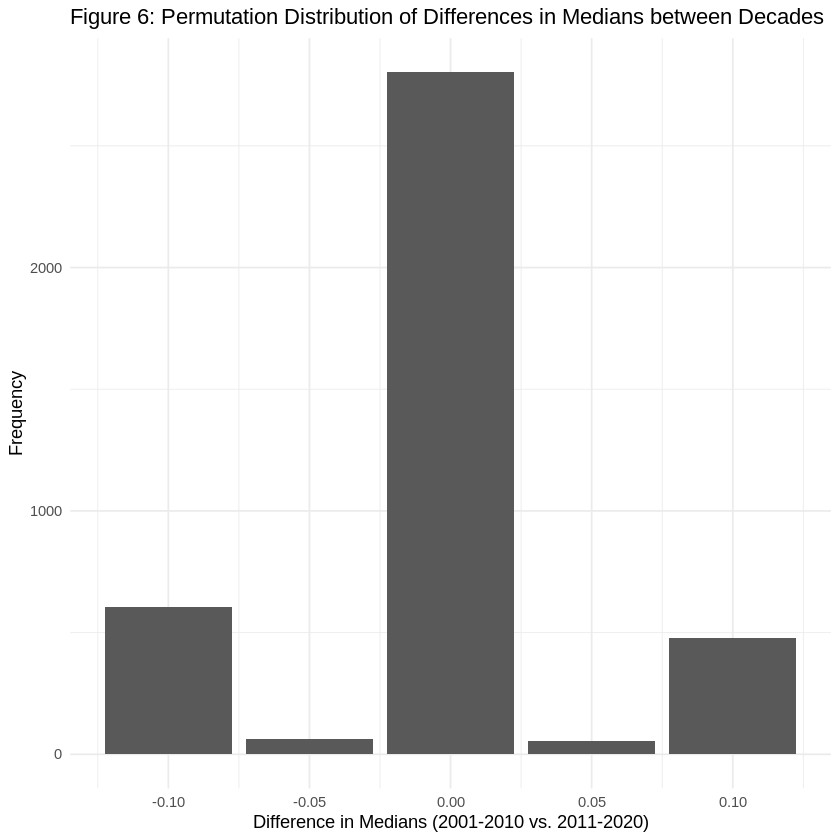

In [12]:
set.seed(2023)  # Setting seed for reproducibility
null_distn_medians <- tidy_combined_data %>%
  specify(formula = score ~ decade) %>%
  hypothesize(null = "independence") %>%
  generate(reps = 4000, type = "permute") %>%
  calculate(stat = "diff in medians", order = c("2001-2010", "2011-2020"))

null_distn_medians %>% 
  visualize() +
  ggtitle("Figure 6: Permutation Distribution of Differences in Medians between Decades") +
  xlab("Difference in Medians (2001-2010 vs. 2011-2020)") +
  ylab("Frequency") +
  theme_minimal()

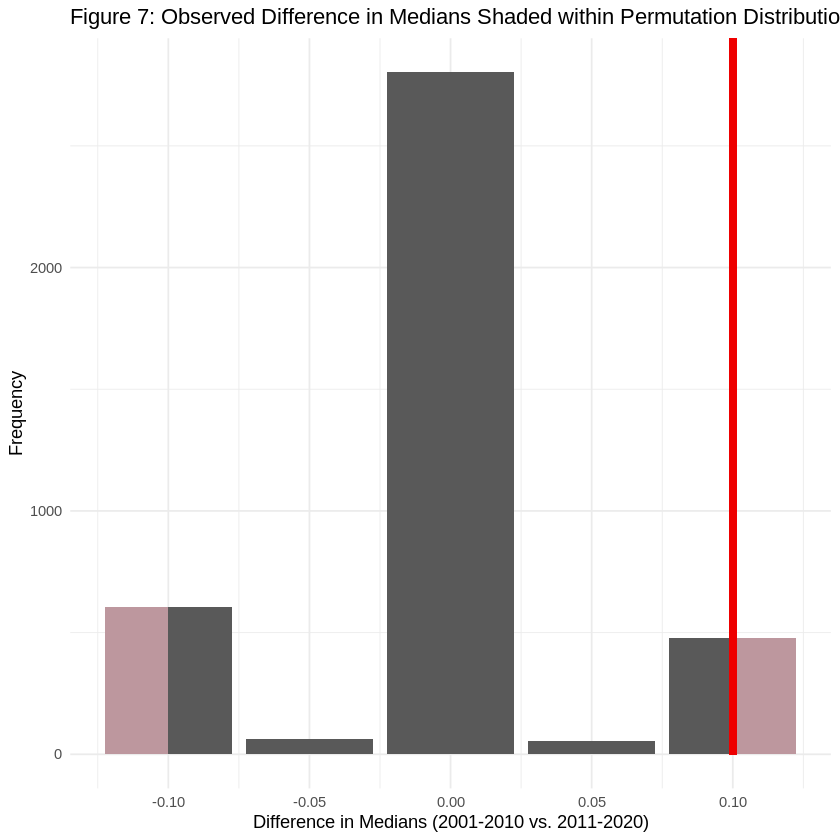

In [13]:
null_distn_medians %>%
  visualize() +
  shade_p_value(obs_stat = d_median_hat, direction = "both") +
  ggtitle("Figure 7: Observed Difference in Medians Shaded within Permutation Distribution") +
  xlab("Difference in Medians (2001-2010 vs. 2011-2020)") +
  ylab("Frequency") +
  theme_minimal()

In [17]:
p_value_median <- null_distn_medians %>%
  get_pvalue(obs_stat = d_median_hat, direction = "both")
cat("Table 8: P-value from Permutation Test Comparing Median Movie Scores between 2001-2010 and 2011-2020\n")
p_value_median

Table 8: P-value from Permutation Test Comparing Median Movie Scores between 2001-2010 and 2011-2020


p_value
<dbl>
0.238


In [ ]:
set.seed(2023)
boot_distn_medians <- tidy_combined_data %>%
  specify(formula = score ~ decade) %>%
  generate(reps = 4000, type = "bootstrap") %>%
  calculate(stat = "diff in medians", order = c("2001-2010", "2011-2020"))

ci_medians <- boot_distn_medians %>%
  get_ci()
cat("Table 9: 95% Confidence Interval for Difference in Median Movie Scores between 2001-2010 and 2011-2020 Using Bootstrap Resampling\n")
ci_medians

boot_distn_medians %>%
  visualize() +
  shade_ci(endpoints = ci_medians) +
  ggtitle("Figure 8: Bootstrap Distribution of Differences in Medians") +
  xlab("Difference in Medians (2001-2010 vs. 2011-2020)") +
  ylab("Frequency") +
  theme_minimal()

Table 9: 95% Confidence Interval for Difference in Median Movie Scores between 2001-2010 and 2011-2020 Using Bootstrap Resampling


lower_ci,upper_ci
<dbl>,<dbl>
-0.2,0


## **Expected Outcomes and Significance**

#### **Expected Findings**

We aim to test the hypothesis concerning the mean IMDb film rating to determine whether there is a significant difference in the average quality of films produced between the two decades, and we expect that 2001-2010 movies do not have a significantly greater mean rating than 2011-2020 movies.

#### **Implications of Findings**

Understanding how films have evolved over time may help filmmakers and studios make informed investment decisions, adapt to changing trends and ensure the continued production of high-quality films.

#### **Future Research Questions**

The study could inspire future research in the movie industry, exploring other factors influencing movie quality in each decade, such as technological advancements, narrative structures, or cultural influences. 

## **References**



Grijalva, D. (2021, July 23). Movie Industry. Kaggle. https://www.kaggle.com/datasets/danielgrijalvas/movies 

Jehoshua Eliashberg, Sam K. Hui, Z. John Zhang, (2007) From Story Line to Box Office: A New Approach for Green-Lighting Movie Scripts. Management Science 53(6):881-893. https://doi.org/10.1287/mnsc.1060.0668

Xie, H., Wang, H., Zhao, C., Wang, Z. (2019). Movie Score Prediction Model Based on Movie Plots. In: Mao, R., Wang, H., Xie, X., Lu, Z. (eds) Data Science. ICPCSEE 2019. Communications in Computer and Information Science, vol 1059. Springer, Singapore. https://doi.org/10.1007/978-981-15-0121-0_49
